## Outlier Identification

In [94]:
# Finding the percentage of outliers using IQR

Q1 = data.quantile(0.25)  # To find the 25th percentile
Q3 = data.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range

# Finding lower and upper bounds for all values. All values outside these bounds are outliers

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

<IPython.core.display.Javascript object>

In [95]:
# Listing the percentage of outliers in each column using IQR

(
    (data.select_dtypes(include=["number"]) < lower)
    | (data.select_dtypes(include=["number"]) > upper)
).sum() / len(data) * 100

Churn                     16.84
Tenure                     1.23
City_Tier                  0.00
CC_Contacted_LY            0.37
Service_Score              0.12
Account_user_count         6.76
CC_Agent_Score             0.00
rev_per_month              1.64
Complain_ly                0.00
rev_growth_yoy             0.00
coupon_used_for_payment   12.26
Day_Since_CC_connect       0.29
cashback                   7.81
dtype: float64

<IPython.core.display.Javascript object>

- As seen above, most of the numerical columns have outliers. However, I choose not to treat them, as in real case scenario the data will have outliers and would want the model to learn the underlying pattern for such customers

## Missing Value Identification

In [96]:
# Listing for the percentage of missing values in the dataset

data.isnull().sum() / data.isnull().count() * 100

Churn                     0.00
Tenure                    1.94
City_Tier                 0.99
CC_Contacted_LY           0.91
Payment                   0.97
Gender                    0.96
Service_Score             0.87
Account_user_count        3.94
account_segment           0.86
CC_Agent_Score            1.03
Marital_Status            1.88
rev_per_month             7.02
Complain_ly               3.17
rev_growth_yoy            0.03
coupon_used_for_payment   0.03
Day_Since_CC_connect      3.18
cashback                  4.20
Login_device              1.96
dtype: float64

<IPython.core.display.Javascript object>

In [97]:
# Creating a list of columns to impute missing values

cols_to_impute = [
    "Tenure",
    "City_Tier",
    "CC_Contacted_LY",
    "Payment",
    "Gender",
    "Service_Score",
    "Account_user_count",
    "account_segment",
    "CC_Agent_Score",
    "Marital_Status",
    "rev_per_month",
    "Complain_ly",
    "rev_growth_yoy",
    "coupon_used_for_payment",
    "Day_Since_CC_connect",
    "cashback",
    "Login_device",
]

<IPython.core.display.Javascript object>

In [98]:
# Defining the value for 'n' neighbors

imputer = KNNImputer(n_neighbors=5)

<IPython.core.display.Javascript object>

In [99]:
# Encoding categorical variables into numerical values to perform KNN imputation

payment = {
    "Debit Card": 0,
    "UPI": 1,
    "Credit Card": 2,
    "Cash on Delivery": 3,
    "E wallet": 4,
}
data["Payment"] = data["Payment"].map(payment)

gender = {"Female": 0, "Male": 1}
data["Gender"] = data["Gender"].map(gender)

account_segment = {
    "Super": 0,
    "Regular Plus": 1,
    "Regular": 2,
    "HNI": 3,
    "Super Plus": 4,
}
data["account_segment"] = data["account_segment"].map(account_segment)

marital_status = {"Single": 0, "Divorced": 1, "Married": 2}
data["Marital_Status"] = data["Marital_Status"].map(marital_status)

login_device = {"Mobile": 0, "Computer": 1, "Other": 2}
data["Login_device"] = data["Login_device"].map(login_device)

<IPython.core.display.Javascript object>

In [100]:
data.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.00,3.00,6.00,0.00,0.00,3.00,3.00,0.00,2.00,0.00,9.00,1.00,11.00,1.00,5.00,159.93,0.00
1,1,0.00,1.00,8.00,1.00,1.00,3.00,4.00,1.00,3.00,0.00,7.00,1.00,15.00,0.00,0.00,120.90,0.00
2,1,0.00,1.00,30.00,0.00,1.00,2.00,4.00,1.00,3.00,0.00,6.00,1.00,14.00,0.00,3.00,NaN,0.00
3,1,0.00,3.00,15.00,0.00,1.00,2.00,4.00,0.00,5.00,0.00,8.00,0.00,23.00,0.00,3.00,134.07,0.00
4,1,0.00,1.00,12.00,2.00,1.00,2.00,3.00,1.00,5.00,0.00,3.00,0.00,11.00,1.00,3.00,129.60,0.00


<IPython.core.display.Javascript object>

- Values have been encoded

## Data Preparation for Modeling

## Split Data

In [101]:
# Separating the dependent and independent variables

X = data.drop("Churn", axis=1)
y = data["Churn"]

<IPython.core.display.Javascript object>

In [102]:
# Splitting the data into training, validation and test sets
# Splitting data into 2 parts, temporary and test sets

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# Splitting the temporary set into train and validation sets

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)

<IPython.core.display.Javascript object>

In [103]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of Testing set : ", X_test.shape)
print("\n Percentage of classes in training set : ")
print(y_train.value_counts(normalize=True))
print("\n Percentage of classes in validation set : ")
print(y_val.value_counts(normalize=True))
print("\n Percentage of classes in test set : ")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (6756, 17)
Shape of Validation set :  (2252, 17)
Shape of Testing set :  (2252, 17)

 Percentage of classes in training set : 
0   0.83
1   0.17
Name: Churn, dtype: float64

 Percentage of classes in validation set : 
0   0.83
1   0.17
Name: Churn, dtype: float64

 Percentage of classes in test set : 
0   0.83
1   0.17
Name: Churn, dtype: float64


<IPython.core.display.Javascript object>

- We have the classes of the dependent variable well balanced in all the three sets

## Missing Value Treatment

In [104]:
# Checking the number of missing values in train, validation and test sets

print(X_train.isna().sum())
print("-" * 40)
print(X_val.isna().sum())
print("-" * 40)
print(X_test.isna().sum())

Tenure                     119
City_Tier                   65
CC_Contacted_LY             66
Payment                     74
Gender                      58
Service_Score               53
Account_user_count         252
account_segment             59
CC_Agent_Score              64
Marital_Status             122
rev_per_month              458
Complain_ly                209
rev_growth_yoy               0
coupon_used_for_payment      2
Day_Since_CC_connect       200
cashback                   274
Login_device               133
dtype: int64
----------------------------------------
Tenure                      52
City_Tier                   27
CC_Contacted_LY             11
Payment                     12
Gender                      26
Service_Score               21
Account_user_count          90
account_segment             18
CC_Agent_Score              25
Marital_Status              41
rev_per_month              173
Complain_ly                 84
rev_growth_yoy               3
coupon_used_for_

<IPython.core.display.Javascript object>

In [105]:
# Fit and transform the train data
X_train[cols_to_impute] = imputer.fit_transform(X_train)

# Transform the validation data
X_val[cols_to_impute] = imputer.transform(X_val)

# Transform the test data
X_test[cols_to_impute] = imputer.transform(X_test)

<IPython.core.display.Javascript object>

In [106]:
# Checking the number of missing values in train, validation and test sets

print(X_train.isna().sum())
print("-" * 40)
print(X_val.isna().sum())
print("-" * 40)
print(X_test.isna().sum())

Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64
----------------------------------------
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback          

<IPython.core.display.Javascript object>

- No more missing values in the dataset

In [107]:
# Function to inverse the encoding of categorical variables


def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

<IPython.core.display.Javascript object>

In [108]:
inverse_mapping(payment, "Payment")
inverse_mapping(gender, "Gender")
inverse_mapping(account_segment, "account_segment")
inverse_mapping(marital_status, "Marital_Status")
inverse_mapping(login_device, "Login_device")

<IPython.core.display.Javascript object>

In [109]:
# Checking inverse mapped categorical values in train data

cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("-" * 40)

Debit Card          2772
Credit Card         2105
E wallet             729
Cash on Delivery     628
UPI                  522
Name: Payment, dtype: int64
----------------------------------------
Male      4077
Female    2679
Name: Gender, dtype: int64
----------------------------------------
Regular Plus    2533
Super           2457
HNI              972
Super Plus       487
Regular          307
Name: account_segment, dtype: int64
----------------------------------------
Married     3563
Single      2128
Divorced    1065
Name: Marital_Status, dtype: int64
----------------------------------------
Mobile      4591
Computer    1849
Other        316
Name: Login_device, dtype: int64
----------------------------------------


<IPython.core.display.Javascript object>

In [110]:
# Checking inverse mapped categorical values in validation data

cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("-" * 40)

Debit Card          920
Credit Card         718
E wallet            261
Cash on Delivery    196
UPI                 157
Name: Payment, dtype: int64
----------------------------------------
Male      1343
Female     909
Name: Gender, dtype: int64
----------------------------------------
Super           818
Regular Plus    814
HNI             336
Super Plus      174
Regular         110
Name: account_segment, dtype: int64
----------------------------------------
Married     1207
Single       696
Divorced     349
Name: Marital_Status, dtype: int64
----------------------------------------
Mobile      1518
Computer     630
Other        104
Name: Login_device, dtype: int64
----------------------------------------


<IPython.core.display.Javascript object>

In [111]:
# Checking inverse mapped categorical values in test data

cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("-" * 40)

Debit Card          909
Credit Card         731
E wallet            227
Cash on Delivery    197
UPI                 188
Name: Payment, dtype: int64
----------------------------------------
Male      1360
Female     892
Name: Gender, dtype: int64
----------------------------------------
Regular Plus    831
Super           810
HNI             335
Super Plus      158
Regular         118
Name: account_segment, dtype: int64
----------------------------------------
Married     1150
Single       718
Divorced     384
Name: Marital_Status, dtype: int64
----------------------------------------
Mobile      1529
Computer     604
Other        119
Name: Login_device, dtype: int64
----------------------------------------


<IPython.core.display.Javascript object>

- Inverse mapping has returned original labels

## Feature Extraction

- From the EDA it was clearly seen that the churn rate for Marital_Status, Payment, account_segment and Login_device w.r.t Male customers was higher than that of Female customers. Hence creating interaction variables for the same.
- Also, the churn pattern for Account_user_count varied w.r.t Service_Score. Hence creating a ratio variable for the same.

### Interaction Variables

### Marital_Status and Gender

In [112]:
def Married_M(df):
    if df["Marital_Status"] == "Married" and df["Gender"] == "Male":
        return 1
    else:
        return 0


X_train["Married_M"] = X_train.apply(lambda X_train: Married_M(X_train), axis=1)
X_val["Married_M"] = X_val.apply(lambda X_val: Married_M(X_val), axis=1)
X_test["Married_M"] = X_test.apply(lambda X_test: Married_M(X_test), axis=1)


def Single_M(df):
    if df["Marital_Status"] == "Single" and df["Gender"] == "Male":
        return 1
    else:
        return 0


X_train["Single_M"] = X_train.apply(lambda X_train: Single_M(X_train), axis=1)
X_val["Single_M"] = X_val.apply(lambda X_val: Single_M(X_val), axis=1)
X_test["Single_M"] = X_test.apply(lambda X_test: Single_M(X_test), axis=1)


def Divorced_M(df):
    if df["Marital_Status"] == "Divorced" and df["Gender"] == "Male":
        return 1
    else:
        return 0


X_train["Divorced_M"] = X_train.apply(lambda X_train: Divorced_M(X_train), axis=1)
X_val["Divorced_M"] = X_val.apply(lambda X_val: Divorced_M(X_val), axis=1)
X_test["Divorced_M"] = X_test.apply(lambda X_test: Divorced_M(X_test), axis=1)

<IPython.core.display.Javascript object>

In [113]:
print(X_train.shape, X_val.shape, X_test.shape)

(6756, 20) (2252, 20) (2252, 20)


<IPython.core.display.Javascript object>

### Payment and Gender

In [114]:
def COD_M(df):
    if df["Payment"] == "Cash on Delivery" and df["Gender"] == "Male":
        return 1
    else:
        return 0


X_train["COD_M"] = X_train.apply(lambda X_train: COD_M(X_train), axis=1)
X_val["COD_M"] = X_val.apply(lambda X_val: COD_M(X_val), axis=1)
X_test["COD_M"] = X_test.apply(lambda X_test: COD_M(X_test), axis=1)


def CC_M(df):
    if df["Payment"] == "Credit Card" and df["Gender"] == "Male":
        return 1
    else:
        return 0


X_train["CC_M"] = X_train.apply(lambda X_train: CC_M(X_train), axis=1)
X_val["CC_M"] = X_val.apply(lambda X_val: CC_M(X_val), axis=1)
X_test["CC_M"] = X_test.apply(lambda X_test: CC_M(X_test), axis=1)


def DC_M(df):
    if df["Payment"] == "Debit Card" and df["Gender"] == "Male":
        return 1
    else:
        return 0


X_train["DC_M"] = X_train.apply(lambda X_train: DC_M(X_train), axis=1)
X_val["DC_M"] = X_val.apply(lambda X_val: DC_M(X_val), axis=1)
X_test["DC_M"] = X_test.apply(lambda X_test: DC_M(X_test), axis=1)


def Ewallet_M(df):
    if df["Payment"] == "E wallet" and df["Gender"] == "Male":
        return 1
    else:
        return 0


X_train["Ewallet_M"] = X_train.apply(lambda X_train: Ewallet_M(X_train), axis=1)
X_val["Ewallet_M"] = X_val.apply(lambda X_val: Ewallet_M(X_val), axis=1)
X_test["Ewallet_M"] = X_test.apply(lambda X_test: Ewallet_M(X_test), axis=1)


def UPI_M(df):
    if df["Payment"] == "UPI" and df["Gender"] == "Male":
        return 1
    else:
        return 0


X_train["UPI_M"] = X_train.apply(lambda X_train: UPI_M(X_train), axis=1)
X_val["UPI_M"] = X_val.apply(lambda X_val: UPI_M(X_val), axis=1)
X_test["UPI_M"] = X_test.apply(lambda X_test: UPI_M(X_test), axis=1)

<IPython.core.display.Javascript object>

In [115]:
print(X_train.shape, X_val.shape, X_test.shape)

(6756, 25) (2252, 25) (2252, 25)


<IPython.core.display.Javascript object>

### Login_device and Gender

In [116]:
def Computer_M(df):
    if df["Login_device"] == "Computer" and df["Gender"] == "Male":
        return 1
    else:
        return 0


X_train["Computer_M"] = X_train.apply(lambda X_train: Computer_M(X_train), axis=1)
X_val["Computer_M"] = X_val.apply(lambda X_val: Computer_M(X_val), axis=1)
X_test["Computer_M"] = X_test.apply(lambda X_test: Computer_M(X_test), axis=1)


def Mobile_M(df):
    if df["Login_device"] == "Mobile" and df["Gender"] == "Male":
        return 1
    else:
        return 0


X_train["Mobile_M"] = X_train.apply(lambda X_train: Mobile_M(X_train), axis=1)
X_val["Mobile_M"] = X_val.apply(lambda X_val: Mobile_M(X_val), axis=1)
X_test["Mobile_M"] = X_test.apply(lambda X_test: Mobile_M(X_test), axis=1)


def Other_device_M(df):
    if df["Login_device"] == "Other" and df["Gender"] == "Male":
        return 1
    else:
        return 0


X_train["Other_device_M"] = X_train.apply(
    lambda X_train: Other_device_M(X_train), axis=1
)
X_val["Other_device_M"] = X_val.apply(lambda X_val: Other_device_M(X_val), axis=1)
X_test["Other_device_M"] = X_test.apply(lambda X_test: Other_device_M(X_test), axis=1)

<IPython.core.display.Javascript object>

In [117]:
print(X_train.shape, X_val.shape, X_test.shape)

(6756, 28) (2252, 28) (2252, 28)


<IPython.core.display.Javascript object>

### Ratio Variable

### Account_user_count and Service_Score

In [118]:
def user_count_ss(df):
    df["user_count_ss"] = (df["Account_user_count"] + 1) / (df["Service_Score"] + 1)
    return df["user_count_ss"]


X_train["user_count_ss"] = X_train.apply(lambda X_train: user_count_ss(X_train), axis=1)
X_val["user_count_ss"] = X_val.apply(lambda X_val: user_count_ss(X_val), axis=1)
X_test["user_count_ss"] = X_test.apply(lambda X_test: user_count_ss(X_test), axis=1)

<IPython.core.display.Javascript object>

In [119]:
print(X_train.shape, X_val.shape, X_test.shape)

(6756, 29) (2252, 29) (2252, 29)


<IPython.core.display.Javascript object>

- Train, validation and test sets now have 29 columns each

## Feature Engineering

In [120]:
# Label encoding the features Payment, account_segment and Login_device

le = LabelEncoder()

X_train["Payment"] = le.fit_transform(X_train["Payment"])
X_val["Payment"] = le.transform(X_val["Payment"])
X_test["Payment"] = le.transform(X_test["Payment"])

X_train["account_segment"] = le.fit_transform(X_train["account_segment"])
X_val["account_segment"] = le.transform(X_val["account_segment"])
X_test["account_segment"] = le.transform(X_test["account_segment"])

X_train["Login_device"] = le.fit_transform(X_train["Login_device"])
X_val["Login_device"] = le.transform(X_val["Login_device"])
X_test["Login_device"] = le.transform(X_test["Login_device"])

<IPython.core.display.Javascript object>

In [121]:
# Checking if the columns have been label encoded

X_train.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Married_M,Single_M,Divorced_M,COD_M,CC_M,DC_M,Ewallet_M,UPI_M,Computer_M,Mobile_M,Other_device_M,user_count_ss
4380,10.00,1.00,12.00,2,Male,4.00,4.00,3,4.00,Single,10.00,0.00,17.00,3.00,8.00,184.14,1,0,1,0,0,0,1,0,0,0,1,0,1.00
4221,12.00,1.00,36.00,2,Female,3.00,4.00,3,1.00,Single,3.00,0.00,12.00,7.00,4.80,149.06,0,0,0,0,0,0,0,0,0,0,0,0,1.25
4073,10.00,1.00,16.00,2,Male,4.00,2.00,2,4.00,Married,3.00,0.00,23.00,2.00,3.00,153.10,0,1,0,0,0,0,1,0,0,1,0,0,0.60
7246,10.00,1.00,40.00,2,Male,2.00,3.00,0,4.00,Married,6.00,1.00,14.00,4.00,9.00,218.49,0,1,0,0,0,0,1,0,0,1,0,0,1.33
6939,25.00,3.00,132.00,2,Male,2.00,3.00,2,1.00,Married,4.00,0.00,15.00,1.00,0.00,138.82,0,1,0,0,0,0,1,0,0,1,0,0,1.33


<IPython.core.display.Javascript object>

In [122]:
# Creating dummy varibales for other categorical features

X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

<IPython.core.display.Javascript object>

In [123]:
# Checking the shape of data

print(X_train.shape, X_val.shape, X_test.shape)

(6756, 30) (2252, 30) (2252, 30)


<IPython.core.display.Javascript object>

In [124]:
# Checking if the columns are properly encoded

X_train.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Married_M,Single_M,Divorced_M,COD_M,CC_M,DC_M,Ewallet_M,UPI_M,Computer_M,Mobile_M,Other_device_M,user_count_ss,Gender_Male,Marital_Status_Married,Marital_Status_Single
4380,10.00,1.00,12.00,2,4.00,4.00,3,4.00,10.00,0.00,17.00,3.00,8.00,184.14,1,0,1,0,0,0,1,0,0,0,1,0,1.00,1,0,1
4221,12.00,1.00,36.00,2,3.00,4.00,3,1.00,3.00,0.00,12.00,7.00,4.80,149.06,0,0,0,0,0,0,0,0,0,0,0,0,1.25,0,0,1
4073,10.00,1.00,16.00,2,4.00,2.00,2,4.00,3.00,0.00,23.00,2.00,3.00,153.10,0,1,0,0,0,0,1,0,0,1,0,0,0.60,1,1,0
7246,10.00,1.00,40.00,2,2.00,3.00,0,4.00,6.00,1.00,14.00,4.00,9.00,218.49,0,1,0,0,0,0,1,0,0,1,0,0,1.33,1,1,0
6939,25.00,3.00,132.00,2,2.00,3.00,2,1.00,4.00,0.00,15.00,1.00,0.00,138.82,0,1,0,0,0,0,1,0,0,1,0,0,1.33,1,1,0


<IPython.core.display.Javascript object>

In [125]:
X_val.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Married_M,Single_M,Divorced_M,COD_M,CC_M,DC_M,Ewallet_M,UPI_M,Computer_M,Mobile_M,Other_device_M,user_count_ss,Gender_Male,Marital_Status_Married,Marital_Status_Single
2414,1.00,1.00,7.00,2,3.00,4.00,2,3.00,2.00,0.00,14.00,0.00,0.00,115.63,1,1,0,0,0,0,1,0,0,0,1,0,1.25,1,1,0
6029,7.00,1.00,22.00,1,2.00,4.00,0,4.00,2.00,0.00,15.00,4.00,7.00,186.21,1,0,0,0,0,0,0,0,0,0,0,0,1.67,0,0,1
603,27.00,1.00,23.00,0,2.00,3.00,0,3.00,9.00,0.00,11.00,1.00,8.00,207.39,1,0,0,0,0,0,0,0,0,0,0,0,1.33,0,0,0
1890,3.00,3.00,33.00,3,3.00,3.00,3,1.00,8.00,0.00,23.00,2.00,7.00,153.04,1,1,0,0,0,0,0,1,0,0,1,0,1.00,1,1,0
5974,0.00,3.00,19.00,4,2.00,3.20,3,3.00,6.20,0.00,13.00,1.00,2.00,154.07,2,0,0,1,0,0,0,0,1,0,0,1,1.40,1,0,0


<IPython.core.display.Javascript object>

In [126]:
X_test.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Married_M,Single_M,Divorced_M,COD_M,CC_M,DC_M,Ewallet_M,UPI_M,Computer_M,Mobile_M,Other_device_M,user_count_ss,Gender_Male,Marital_Status_Married,Marital_Status_Single
4203,1.00,3.00,15.00,2,3.00,4.00,0,3.00,3.00,0.00,16.00,2.00,8.00,212.26,0,0,1,0,0,0,1,0,0,1,0,0,1.25,1,0,1
3636,4.00,3.00,32.00,3,3.00,5.00,0,4.00,4.00,1.00,13.00,1.00,1.00,215.94,1,0,1,0,0,0,0,1,0,0,1,0,1.50,1,0,1
5152,13.00,1.00,32.00,2,4.00,4.00,0,3.00,5.00,0.00,22.00,1.00,6.00,234.20,0,1,0,0,0,0,1,0,0,1,0,0,1.00,1,1,0
9665,99.00,1.00,30.00,4,3.00,5.00,3,4.00,2.00,1.00,12.00,2.00,3.00,176.88,1,0,0,0,0,0,0,0,0,0,0,0,1.50,0,1,0
6678,9.00,1.00,13.00,2,2.00,3.00,0,5.00,8.00,0.00,12.00,1.00,2.00,180.08,1,0,0,0,0,0,0,0,0,0,0,0,1.33,0,1,0


<IPython.core.display.Javascript object>

- Train, validation and test sets are now ready for model building

## Alternate Analytical Approach

- Use Simple Imputer to impute missing values
- Cap the outliers w.r.t Inter-Quartile Range
- Bin features like Tenure / rev_growth_yoy
- Ordinal encode account_segment on the basis of spend
- Scale continuous features using StandardScaler() to build Logistic Regression model

## Model Evaluation Criterion

### Model can make wrong predictions such as :

   1. Predicting a customer will churn but in reality the customer will not
   2. Predicting a customer will not quit the service but in reality the customer will churn
    
### Prediction of concern :

The second prediction is our major concern as customers renouncing the services would lead to loss and our aim is to build a prediction model to minimize the churn

### Minimizing false negatives :

**Recall** score should be maximized. Greater the Recall score, higher the chances of predicting the customers who may churn

## User-defined functions to evaluate and plot metric scores

In [127]:
# defining a function to compute different metrics to check performance of classification models built using sklearn


def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    model : classifier
    predictors : independent variables
    target : dependent variable
    
    """
    # predicting using the independent variables
    pred = model.predict(predictors)
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1}, index=[0]
    )
    return df_perf

<IPython.core.display.Javascript object>

In [128]:
# defining a function to plot the confusion matrix


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Model Building

In [129]:
# K-Folds cross validation of model performances

models = []  # Empty list to store all the models

# Appending the models to the list
models.append(("LR", LogisticRegression(solver="newton-cg", random_state=1)))
models.append(("Dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("RandomForest", RandomForestClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []  # Empty list to store all models' CV scores
names = []  # Empty list to store name of the models

# Looping through all the models to get the mean cross validated score
print("Cross-Validation Performance :\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting the number of splits to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{} : {}".format(name, cv_result.mean() * 100))

print("\nValidation set Performance :\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val)) * 100
    print("{} : {}".format(name, scores))

Cross-Validation Performance :

LR : 37.257516036788004
Dtree : 78.11925187417884
Bagging : 76.18826802689543
RandomForest : 78.99837699976814
Adaboost : 57.208439601205654
GBM : 60.548342221191746
XGBoost : 83.74294767756396

Validation set Performance :

LR : 42.480211081794195
Dtree : 85.75197889182058
Bagging : 83.37730870712402
RandomForest : 86.54353562005277
Adaboost : 61.477572559366756
GBM : 62.796833773087066
XGBoost : 88.12664907651715


<IPython.core.display.Javascript object>

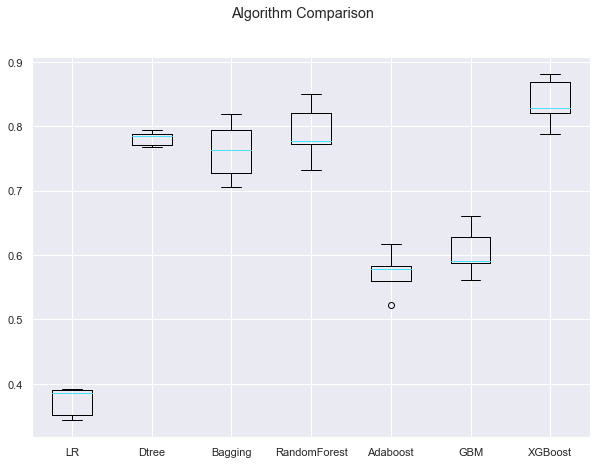

<IPython.core.display.Javascript object>

In [130]:
# Plotting boxplots for CV scores of models defined above

fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- XGBoost is giving the highest mean cross-validated Recall followed by RandomForest, DecisionTree and Bagging classifiers
- All the above models are consistent without any outliers
- Highest validation set Recall achieved is 88 by XGBoost. 
- **Will build the above models, hypertune and stack them to get much better results**

## Decision Tree Classifier

In [131]:
# Fitting the model
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

Training Performance :
   Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.95    0.86       0.85 0.85 



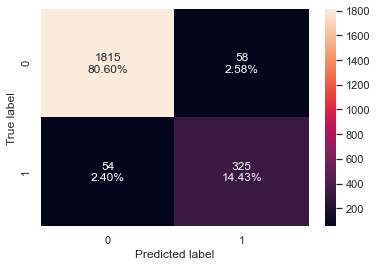

<IPython.core.display.Javascript object>

In [132]:
# Calculating different metrics

print("Training Performance :")
dtree_train_perf = model_performance_classification(dtree, X_train, y_train)
print(dtree_train_perf)

print("\nValidation Performace :")
dtree_val_perf = model_performance_classification(dtree, X_val, y_val)
print(dtree_val_perf, "\n")

confusion_matrix_sklearn(dtree, X_val, y_val)

- The model is overfitting the train data with default parameters
- Will hypertune to reduce overfitting

### Hyperparameter tuning

In [133]:
# Choose the type of classifier
dtree_tuned = DecisionTreeClassifier(class_weight={0: 0.20, 1: 0.80}, random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 30),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15],
}

# Type of scoring used to compare parameter combinations
# scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring="recall", n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=7,
                       max_leaf_nodes=15, random_state=1)

<IPython.core.display.Javascript object>

Training Performance :
   Accuracy  Recall  Precision   F1
0      0.87    0.76       0.58 0.66

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.87    0.74       0.58 0.65 



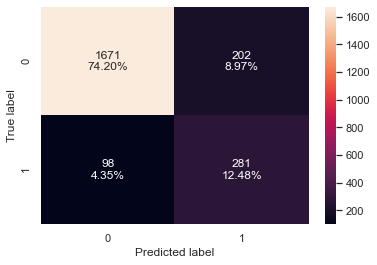

<IPython.core.display.Javascript object>

In [134]:
# Calculating different metrics

print("Training Performance :")
dtree_tuned_train_perf = model_performance_classification(dtree_tuned, X_train, y_train)
print(dtree_tuned_train_perf)

print("\nValidation Performace :")
dtree_tuned_val_perf = model_performance_classification(dtree_tuned, X_val, y_val)
print(dtree_tuned_val_perf, "\n")

confusion_matrix_sklearn(dtree_tuned, X_val, y_val)

- The model is generalizing well with tuned parameters but with low metric scores

## Bagging Classifier

In [135]:
# Fitting the model
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

Training Performance :
   Accuracy  Recall  Precision   F1
0      1.00    0.99       0.99 0.99

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.96    0.83       0.92 0.87 



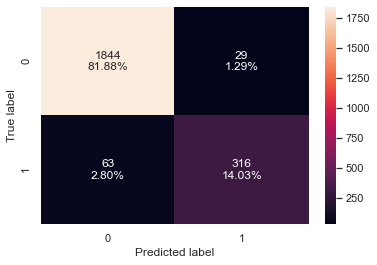

<IPython.core.display.Javascript object>

In [136]:
# Calculating different metrics

print("Training Performance :")
bagging_train_perf = model_performance_classification(bagging, X_train, y_train)
print(bagging_train_perf)

print("\nValidation Performace :")
bagging_val_perf = model_performance_classification(bagging, X_val, y_val)
print(bagging_val_perf, "\n")

confusion_matrix_sklearn(bagging, X_val, y_val)

- The model is overfitting the train set
- With default parameters, the bagging classifier is performing better in terms of Precision than Recall

In [137]:
# Fitting the model with dtree_tuned as base_estimator
bagging_tdtree = BaggingClassifier(base_estimator=dtree_tuned, random_state=1)
bagging_tdtree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                      1: 0.8},
                                                        max_depth=7,
                                                        max_leaf_nodes=15,
                                                        random_state=1),
                  random_state=1)

<IPython.core.display.Javascript object>

Training Performance :
   Accuracy  Recall  Precision   F1
0      0.87    0.82       0.59 0.68

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.88    0.84       0.61 0.71 



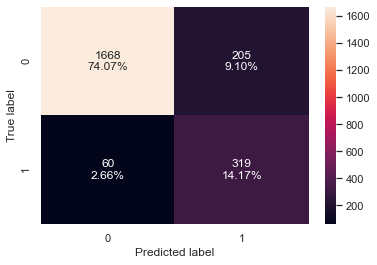

<IPython.core.display.Javascript object>

In [138]:
# Calculating different metrics

print("Training Performance :")
bagging_tdtree_train_perf = model_performance_classification(
    bagging_tdtree, X_train, y_train
)
print(bagging_tdtree_train_perf)

print("\nValidation Performace :")
bagging_tdtree_val_perf = model_performance_classification(bagging_tdtree, X_val, y_val)
print(bagging_tdtree_val_perf, "\n")

confusion_matrix_sklearn(bagging_tdtree, X_val, y_val)

- The model is generalizing well, but precision is too low
- Will try to improve the scores by tuning this model

### Hyperparameter tuning

In [139]:
# Choose the type of classifier
bagging_tuned_tdtree = BaggingClassifier(base_estimator=dtree_tuned, random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": np.arange(0.2, 1, 0.1),
    "n_estimators": [40, 50, 60],
    "max_features": np.arange(0.2, 1, 0.1),
}

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned_tdtree, parameters, scoring="recall", cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
bagging_tuned_tdtree = grid_obj.best_estimator_

# Fit the best algorithm to the data
bagging_tuned_tdtree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                      1: 0.8},
                                                        max_depth=7,
                                                        max_leaf_nodes=15,
                                                        random_state=1),
                  max_features=0.9000000000000001,
                  max_samples=0.9000000000000001, n_estimators=50,
                  random_state=1)

<IPython.core.display.Javascript object>

Training Performance :
   Accuracy  Recall  Precision   F1
0      0.87    0.81       0.59 0.68

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.88    0.81       0.61 0.70 



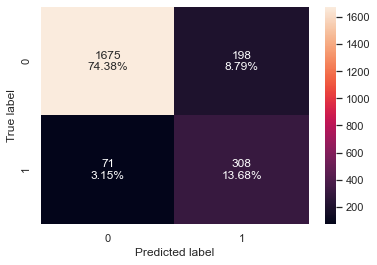

<IPython.core.display.Javascript object>

In [140]:
# Calculating different metrics

print("Training Performance :")
bagging_tuned_tdtree_train_perf = model_performance_classification(
    bagging_tuned_tdtree, X_train, y_train
)
print(bagging_tuned_tdtree_train_perf)

print("\nValidation Performace :")
bagging_tuned_tdtree_val_perf = model_performance_classification(
    bagging_tuned_tdtree, X_val, y_val
)
print(bagging_tuned_tdtree_val_perf, "\n")

confusion_matrix_sklearn(bagging_tuned_tdtree, X_val, y_val)

- Bagging classifier with tuned decision tree as base is a well fit model as it gives a consistent recall scores in train and test data
- However no improvement in the scores
- Will tune the model with dtree as base to check for better recall

In [141]:
# Choose the type of classifier
bagging_tuned_dt = BaggingClassifier(base_estimator=dtree, random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": np.arange(0.2, 1, 0.1),
    "n_estimators": [60, 70, 80],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned_dt, parameters, scoring="recall", cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
bagging_tuned_dt = grid_obj.best_estimator_

# Fit the best algorithm to the data
bagging_tuned_dt.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.9, max_samples=0.9000000000000001,
                  n_estimators=70, random_state=1)

<IPython.core.display.Javascript object>

Training Performance :
   Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.97    0.88       0.95 0.91 



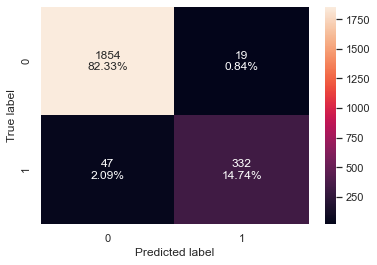

<IPython.core.display.Javascript object>

In [142]:
# Calculating different metrics

print("Training Performance :")
bagging_tuned_dt_train_perf = model_performance_classification(
    bagging_tuned_dt, X_train, y_train
)
print(bagging_tuned_dt_train_perf)

print("\nValidation Performace :")
bagging_tuned_dt_val_perf = model_performance_classification(
    bagging_tuned_dt, X_val, y_val
)
print(bagging_tuned_dt_val_perf, "\n")

confusion_matrix_sklearn(bagging_tuned_dt, X_val, y_val)

- Model is overfit on the train data
- Precision is much higher than Recall

## Random Forest Classifier

In [143]:
# Fitting the model
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

Training Performance :
   Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.97    0.87       0.97 0.91 



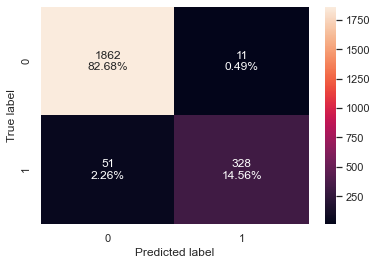

<IPython.core.display.Javascript object>

In [144]:
# Calculating different metrics

print("Training Performance :")
rf_train_perf = model_performance_classification(rf, X_train, y_train)
print(rf_train_perf)

print("\nValidation Performace :")
rf_val_perf = model_performance_classification(rf, X_val, y_val)
print(rf_val_perf, "\n")

confusion_matrix_sklearn(rf, X_val, y_val)

- Similar to the previous model performance
- Will try tuning the model by adding class weights

### Feature importance of Random Forest

In [145]:
# Importance of features in the tree building

print(
    pd.DataFrame(
        rf.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Tenure                  0.22
cashback                0.08
Complain_ly             0.07
Day_Since_CC_connect    0.07
CC_Contacted_LY         0.06
CC_Agent_Score          0.05
rev_per_month           0.05
rev_growth_yoy          0.05
user_count_ss           0.05
Payment                 0.03
account_segment         0.03
coupon_used_for_payment 0.03
Account_user_count      0.03
City_Tier               0.02
Marital_Status_Single   0.02
Login_device            0.02
Service_Score           0.02
Single_M                0.01
Marital_Status_Married  0.01
DC_M                    0.01
Mobile_M                0.01
CC_M                    0.01
Computer_M              0.01
Gender_Male             0.01
COD_M                   0.01
Married_M               0.01
Ewallet_M               0.01
Divorced_M              0.00
UPI_M                   0.00
Other_device_M          0.00


<IPython.core.display.Javascript object>

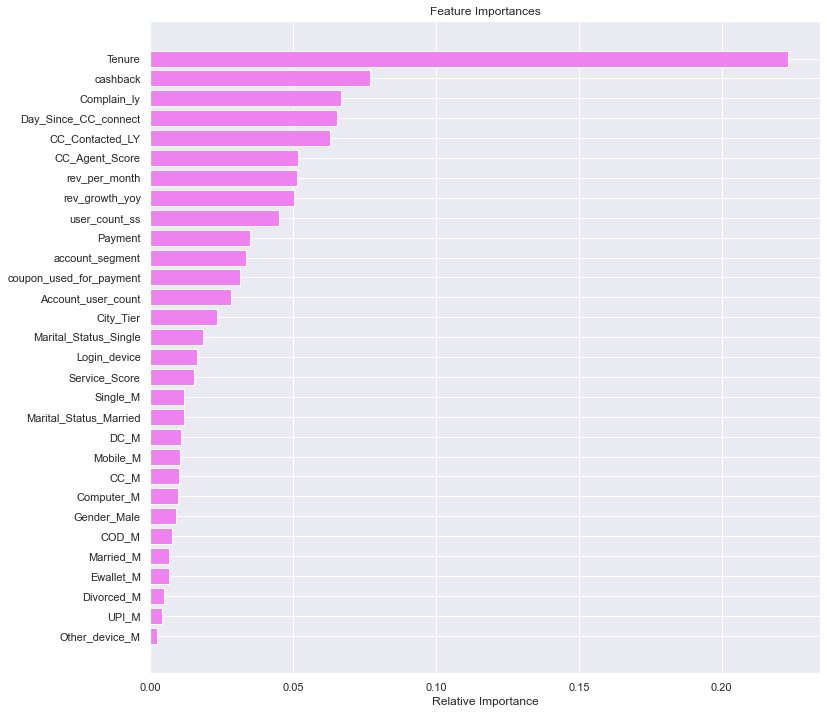

<IPython.core.display.Javascript object>

In [146]:
importances = rf.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Tenure is given the highest feature importance
- Most of the newly created features have been given importance in model building with user_count_ss with much higher significance

In [147]:
# Choose the type of classifier
rf_tuned = RandomForestClassifier(class_weight={0: 17, 1: 83}, random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [206],
    "min_samples_leaf": [5, 6, 7],
    "max_samples": [0.5, 0.6, 0.7],
    "max_features": np.arange(0.2, 0.7, 0.1),
}

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring="recall", cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 17, 1: 83},
                       max_features=0.6000000000000001, max_samples=0.7,
                       min_samples_leaf=6, n_estimators=206, random_state=1)

<IPython.core.display.Javascript object>

Training Performance :
   Accuracy  Recall  Precision   F1
0      0.96    0.96       0.83 0.89

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.94    0.88       0.77 0.82 



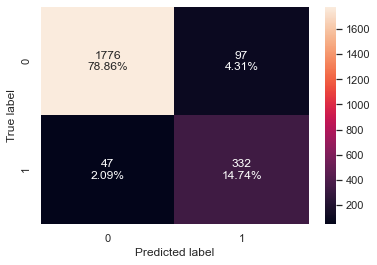

<IPython.core.display.Javascript object>

In [148]:
# Calculating different metrics

print("Training Performance :")
rf_tuned_train_perf = model_performance_classification(rf_tuned, X_train, y_train)
print(rf_tuned_train_perf)

print("\nValidation Performace :")
rf_tuned_val_perf = model_performance_classification(rf_tuned, X_val, y_val)
print(rf_tuned_val_perf, "\n")

confusion_matrix_sklearn(rf_tuned, X_val, y_val)

- Better performance on the train data 
- Not so generalized performance on the validation data

## XGBoost Classifier

In [149]:
# Fitting the model
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

Training Performance :
   Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.97    0.88       0.95 0.92 



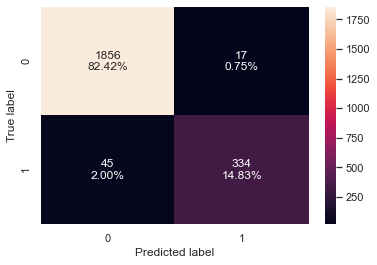

<IPython.core.display.Javascript object>

In [150]:
# Calculating different metrics

print("Training Performance :")
xgb_train_perf = model_performance_classification(xgb, X_train, y_train)
print(xgb_train_perf)

print("\nValidation Performace :")
xgb_val_perf = model_performance_classification(xgb, X_val, y_val)
print(xgb_val_perf, "\n")

confusion_matrix_sklearn(xgb, X_val, y_val)

- Model overfit on the train data
- Precision much higher than Recall

### Hyperparameter tuning

In [151]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [90],  # np.arange(10, 100, 10),
    "scale_pos_weight": [5],  # [0, 1, 2, 5],
    "subsample": [1],  # [0.5, 0.7, 0.9, 1],
    "learning_rate": [0.2],  # [0.01, 0.1, 0.2, 0.05],
    "gamma": [3],  # [0, 1, 3],
    "colsample_bytree": [0.9],  # [0.5, 0.7, 0.9, 1],
    "colsample_bylevel": [0.5],  # [0.5, 0.7, 0.9, 1],
}

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring="recall", cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

Training Performance :
   Accuracy  Recall  Precision   F1
0      0.99    1.00       0.93 0.97

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.95    0.93       0.82 0.87 



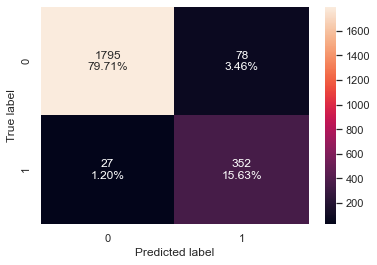

<IPython.core.display.Javascript object>

In [152]:
# Calculating different metrics

print("Training Performance :")
xgb_tuned_train_perf = model_performance_classification(xgb_tuned, X_train, y_train)
print(xgb_tuned_train_perf)

print("\nValidation Performace :")
xgb_tuned_val_perf = model_performance_classification(xgb_tuned, X_val, y_val)
print(xgb_tuned_val_perf, "\n")

confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

- Model overfit on the train data
- Highest Recall achieved so far

### Feature importance of XGBoost (Tuned)

In [153]:
# Importance of features in the model building

print(
    pd.DataFrame(
        xgb_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Tenure                  0.14
Complain_ly             0.08
Marital_Status_Single   0.05
account_segment         0.04
Single_M                0.04
City_Tier               0.04
CC_Agent_Score          0.04
COD_M                   0.03
Day_Since_CC_connect    0.03
CC_M                    0.03
rev_per_month           0.03
Login_device            0.03
Computer_M              0.03
coupon_used_for_payment 0.03
Account_user_count      0.03
DC_M                    0.03
Payment                 0.03
Gender_Male             0.02
CC_Contacted_LY         0.02
Married_M               0.02
user_count_ss           0.02
Mobile_M                0.02
Marital_Status_Married  0.02
cashback                0.02
rev_growth_yoy          0.02
Ewallet_M               0.02
Service_Score           0.02
Other_device_M          0.02
UPI_M                   0.02
Divorced_M              0.01


<IPython.core.display.Javascript object>

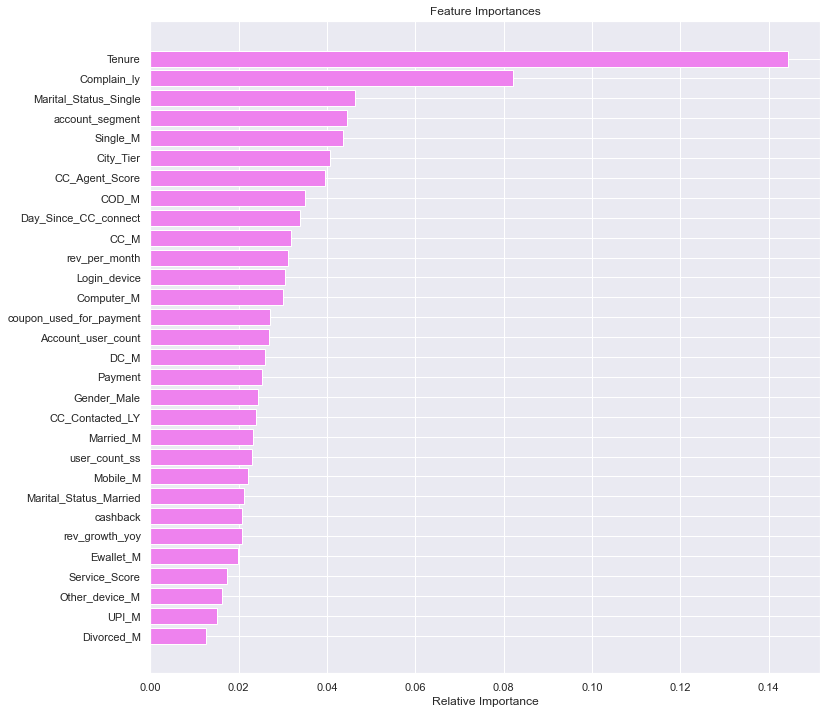

<IPython.core.display.Javascript object>

In [154]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Tenure is given the highest importance 
- Each newly created feature has some significance in model building 

## Comparison of Train and Validation Performances

In [155]:
# Training performance comparison
# Creating a dataframe of training scores

models_train_comp_df = pd.concat(
    [
        dtree_train_perf.T,
        dtree_tuned_train_perf.T,
        bagging_train_perf.T,
        bagging_tdtree_train_perf.T,
        bagging_tuned_tdtree_train_perf.T,
        bagging_tuned_dt_train_perf.T,
        rf_train_perf.T,
        rf_tuned_train_perf.T,
        xgb_train_perf.T,
        xgb_tuned_train_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging with default parameters",
    "Bagging with base dtree_tuned",
    "Bagging Tuned with base dtree_tuned",
    "Bagging Tuned with base dtree",
    "Random Forest",
    "Random Forest Tuned",
    "XGBoost",
    "XGBoost Tuned",
]

<IPython.core.display.Javascript object>

In [156]:
# Validation performance comparison
# Creating a dataframe of validation scores

models_val_comp_df = pd.concat(
    [
        dtree_val_perf.T,
        dtree_tuned_val_perf.T,
        bagging_val_perf.T,
        bagging_tdtree_val_perf.T,
        bagging_tuned_tdtree_val_perf.T,
        bagging_tuned_dt_val_perf.T,
        rf_val_perf.T,
        rf_tuned_val_perf.T,
        xgb_val_perf.T,
        xgb_tuned_val_perf.T,
    ],
    axis=1,
)

models_val_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging with default parameters",
    "Bagging with base dtree_tuned",
    "Bagging Tuned with base dtree_tuned",
    "Bagging Tuned with dtree",
    "Random Forest",
    "Random Forest Tuned",
    "XGBoost",
    "XGBoost Tuned",
]

<IPython.core.display.Javascript object>

In [157]:
print("Training performance comparison :")
models_train_comp_df

Training performance comparison :


,Decision Tree,Decision Tree Tuned,Bagging with default parameters,Bagging with base dtree_tuned,Bagging Tuned with base dtree_tuned,Bagging Tuned with base dtree,Random Forest,Random Forest Tuned,XGBoost,XGBoost Tuned
Accuracy,1.00,0.87,1.00,0.87,0.87,1.00,1.00,0.96,1.00,0.99
Recall,1.00,0.76,0.99,0.82,0.81,1.00,1.00,0.96,1.00,1.00
Precision,1.00,0.58,0.99,0.59,0.59,1.00,1.00,0.83,1.00,0.93
F1,1.00,0.66,0.99,0.68,0.68,1.00,1.00,0.89,1.00,0.97


<IPython.core.display.Javascript object>

In [158]:
print("Validation performance comparison :")
models_val_comp_df

Validation performance comparison :


,Decision Tree,Decision Tree Tuned,Bagging with default parameters,Bagging with base dtree_tuned,Bagging Tuned with base dtree_tuned,Bagging Tuned with dtree,Random Forest,Random Forest Tuned,XGBoost,XGBoost Tuned
Accuracy,0.95,0.87,0.96,0.88,0.88,0.97,0.97,0.94,0.97,0.95
Recall,0.86,0.74,0.83,0.84,0.81,0.88,0.87,0.88,0.88,0.93
Precision,0.85,0.58,0.92,0.61,0.61,0.95,0.97,0.77,0.95,0.82
F1,0.85,0.65,0.87,0.71,0.70,0.91,0.91,0.82,0.92,0.87


<IPython.core.display.Javascript object>

- Decision tree, Bagging and Random forest models with default parameters are overfit
- Tuned decision tree is giving a generalized performance
- Tuned bagging classifier with dtree_tuned as base estimator is generalizing well
- Tuned random forest is also overfit
- Tuned xgboost model is giving much higher recall than the model with default parameters

## Best Individual Models

In [159]:
# Training performance comparison
# Creating a dataframe of training scores

best_models_train_comp_df = pd.concat(
    [bagging_tdtree_train_perf.T, bagging_tuned_tdtree_train_perf.T,], axis=1,
)

best_models_train_comp_df.columns = [
    "Bagging with base dtree_tuned",
    "Bagging Tuned with base dtree_tuned",
]

# Validation performance comparison
# Creating a dataframe of training scores

best_models_val_comp_df = pd.concat(
    [bagging_tdtree_val_perf.T, bagging_tuned_tdtree_val_perf.T,], axis=1,
)

best_models_val_comp_df.columns = [
    "Bagging with base dtree_tuned",
    "Bagging Tuned with base dtree_tuned",
]

<IPython.core.display.Javascript object>

In [160]:
print("Training performance comparison :")
best_models_train_comp_df

Training performance comparison :


,Bagging with base dtree_tuned,Bagging Tuned with base dtree_tuned
Accuracy,0.87,0.87
Recall,0.82,0.81
Precision,0.59,0.59
F1,0.68,0.68


<IPython.core.display.Javascript object>

In [161]:
print("Validation performance comparison :")
best_models_val_comp_df

Validation performance comparison :


,Bagging with base dtree_tuned,Bagging Tuned with base dtree_tuned
Accuracy,0.88,0.88
Recall,0.84,0.81
Precision,0.61,0.61
F1,0.71,0.70


<IPython.core.display.Javascript object>

- Both these models are generalizing well on the train and validation sets
- Highest Recall achieved is 84 by Bagging Classifier with tuned decision tree as base estimator

## Stacking Classifier

- Will build stacking models with combinations of above models with tuned xgboost model as the final estimator to achieve higher Recall with good Precision scores
- Compare the stacking model performances to identify the best model

In [162]:
# Stacking 1
# Building a stacking classifier with the best individual models

estimators1 = [
    ("Bagging with base dtree_tuned", bagging_tdtree),
    ("Bagging Tuned with base dtree_tuned", bagging_tuned_tdtree),
]
final_estimator = xgb_tuned

stacking_classifier1 = StackingClassifier(
    estimators=estimators1, final_estimator=final_estimator
)
stacking_classifier1.fit(X_train, y_train)

StackingClassifier(estimators=[('Bagging with base dtree_tuned',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                                                      1: 0.8},
                                                                                        max_depth=7,
                                                                                        max_leaf_nodes=15,
                                                                                        random_state=1),
                                                  random_state=1)),
                               ('Bagging Tuned with base dtree_tuned',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                                                      1: 0.8},
                                         

<IPython.core.display.Javascript object>

Training Performance :
   Accuracy  Recall  Precision   F1
0      0.85    0.81       0.53 0.64

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.86    0.80       0.55 0.65


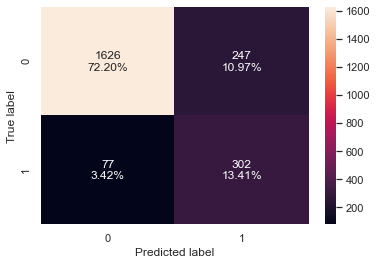

<IPython.core.display.Javascript object>

In [163]:
# Calculating different metrics

print("Training Performance :")
stacking1_train_perf = model_performance_classification(
    stacking_classifier1, X_train, y_train
)
print(stacking1_train_perf)

print("\nValidation Performace :")
stacking1_val_perf = model_performance_classification(
    stacking_classifier1, X_val, y_val
)
print(stacking1_val_perf)

confusion_matrix_sklearn(stacking_classifier1, X_val, y_val)

- Model is generalizing well on both train and validation sets
- However, the Precision is too low

In [164]:
# Stacking 2
# Building a stacking classifier with the best individual models and bagging classifier
# with default parameters, as it gave higher Recall and Precision scores

estimators2 = [
    ("Bagging with base dtree_tuned", bagging_tdtree),
    ("Bagging with default parameters", bagging),
    ("Bagging Tuned with base dtree_tuned", bagging_tuned_tdtree),
]
final_estimator = xgb_tuned

stacking_classifier2 = StackingClassifier(
    estimators=estimators2, final_estimator=final_estimator
)
stacking_classifier2.fit(X_train, y_train)

StackingClassifier(estimators=[('Bagging with base dtree_tuned',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                                                      1: 0.8},
                                                                                        max_depth=7,
                                                                                        max_leaf_nodes=15,
                                                                                        random_state=1),
                                                  random_state=1)),
                               ('Bagging with default parameters',
                                BaggingClassifier(random_state=1)),
                               ('Bagging Tuned with base dtree_tuned',
                                BaggingClassifier(base_estimator=Decision...
                                                 e

<IPython.core.display.Javascript object>

Training Performance :
   Accuracy  Recall  Precision   F1
0      0.99    1.00       0.96 0.98

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.95    0.92       0.80 0.85


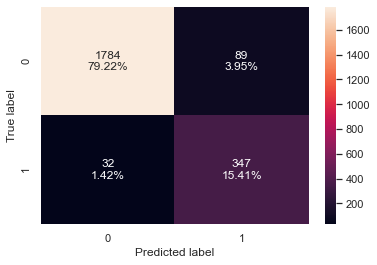

<IPython.core.display.Javascript object>

In [165]:
# Calculating different metrics

print("Training Performance :")
stacking2_train_perf = model_performance_classification(
    stacking_classifier2, X_train, y_train
)
print(stacking2_train_perf)

print("\nValidation Performace :")
stacking2_val_perf = model_performance_classification(
    stacking_classifier2, X_val, y_val
)
print(stacking2_val_perf)

confusion_matrix_sklearn(stacking_classifier2, X_val, y_val)

- Model overfit on train data
- Highest Recall on validation so far
- Precision has improved comparatively

In [166]:
# Stacking 3
# Building a stacking classifier with tuned bagging classifier having
# decision tree as the base estimator

estimators3 = [
    ("Bagging with base dtree_tuned", bagging_tdtree),
    ("Bagging with default parameters", bagging),
    ("Bagging Tuned with base dtree", bagging_tuned_dt),
]
final_estimator = xgb_tuned

stacking_classifier3 = StackingClassifier(
    estimators=estimators3, final_estimator=final_estimator
)
stacking_classifier3.fit(X_train, y_train)

StackingClassifier(estimators=[('Bagging with base dtree_tuned',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                                                      1: 0.8},
                                                                                        max_depth=7,
                                                                                        max_leaf_nodes=15,
                                                                                        random_state=1),
                                                  random_state=1)),
                               ('Bagging with default parameters',
                                BaggingClassifier(random_state=1)),
                               ('Bagging Tuned with base dtree',
                                BaggingClassifier(base_estimator=DecisionTreeCl...
                                                 e

<IPython.core.display.Javascript object>

Training Performance :
   Accuracy  Recall  Precision   F1
0      1.00    1.00       0.99 1.00

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.97    0.96       0.86 0.90


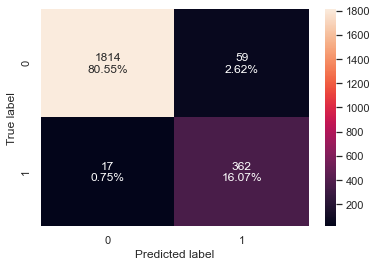

<IPython.core.display.Javascript object>

In [167]:
# Calculating different metrics

print("Training Performance :")
stacking3_train_perf = model_performance_classification(
    stacking_classifier3, X_train, y_train
)
print(stacking3_train_perf)

print("\nValidation Performace :")
stacking3_val_perf = model_performance_classification(
    stacking_classifier3, X_val, y_val
)
print(stacking3_val_perf)

confusion_matrix_sklearn(stacking_classifier3, X_val, y_val)

- Highest Recall score so far
- However, model is much overfit on Precision comparatively

In [168]:
# Stacking 4
# Stacking the above model with random forest classifier with base estimators
# in order to get a better Precision score

estimators4 = [
    ("Bagging with base dtree_tuned", bagging_tdtree),
    ("Bagging with default parameters", bagging),
    ("Bagging Tuned with base dtree", bagging_tuned_dt),
    ("Random Forest", rf),
]
final_estimator = xgb_tuned

stacking_classifier4 = StackingClassifier(
    estimators=estimators4, final_estimator=final_estimator
)
stacking_classifier4.fit(X_train, y_train)

StackingClassifier(estimators=[('Bagging with base dtree_tuned',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                                                      1: 0.8},
                                                                                        max_depth=7,
                                                                                        max_leaf_nodes=15,
                                                                                        random_state=1),
                                                  random_state=1)),
                               ('Bagging with default parameters',
                                BaggingClassifier(random_state=1)),
                               ('Bagging Tuned with base dtree',
                                BaggingClassifier(base_estimator=DecisionTreeCl...
                                                 e

<IPython.core.display.Javascript object>

Training Performance :
   Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.97    0.95       0.90 0.92


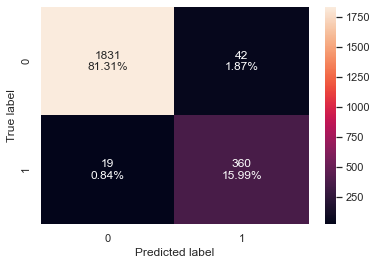

<IPython.core.display.Javascript object>

In [169]:
# Calculating different metrics

print("Training Performance :")
stacking4_train_perf = model_performance_classification(
    stacking_classifier4, X_train, y_train
)
print(stacking4_train_perf)

print("\nValidation Performace :")
stacking4_val_perf = model_performance_classification(
    stacking_classifier4, X_val, y_val
)
print(stacking4_val_perf)

confusion_matrix_sklearn(stacking_classifier4, X_val, y_val)

- Model overfit on train data
- However, really good Recall and highest Precision score so far

## Comparison of Stacking Model Performances

In [170]:
# Training performance comparison
# Creating a dataframe of training scores

stack_models_train_comp_df = pd.concat(
    [
        stacking1_train_perf.T,
        stacking2_train_perf.T,
        stacking3_train_perf.T,
        stacking4_train_perf.T,
    ],
    axis=1,
)

stack_models_train_comp_df.columns = [
    "Stacking_Classifier1",
    "Stacking_Classifier2",
    "Stacking_Classifier3",
    "Stacking_Classifier4",
]

<IPython.core.display.Javascript object>

In [171]:
# Training performance comparison
# Creating a dataframe of validation scores

stack_models_val_comp_df = pd.concat(
    [
        stacking1_val_perf.T,
        stacking2_val_perf.T,
        stacking3_val_perf.T,
        stacking4_val_perf.T,
    ],
    axis=1,
)

stack_models_val_comp_df.columns = [
    "Stacking_Classifier1",
    "Stacking_Classifier2",
    "Stacking_Classifier3",
    "Stacking_Classifier4",
]

<IPython.core.display.Javascript object>

In [172]:
print("Stacking models Training performance comparison :")
stack_models_train_comp_df

Stacking models Training performance comparison :


,Stacking_Classifier1,Stacking_Classifier2,Stacking_Classifier3,Stacking_Classifier4
Accuracy,0.85,0.99,1.00,1.00
Recall,0.81,1.00,1.00,1.00
Precision,0.53,0.96,0.99,1.00
F1,0.64,0.98,1.00,1.00


<IPython.core.display.Javascript object>

In [173]:
print("Stacking models Validation performance comparison :")
stack_models_val_comp_df

Stacking models Validation performance comparison :


,Stacking_Classifier1,Stacking_Classifier2,Stacking_Classifier3,Stacking_Classifier4
Accuracy,0.86,0.95,0.97,0.97
Recall,0.80,0.92,0.96,0.95
Precision,0.55,0.80,0.86,0.90
F1,0.65,0.85,0.90,0.92


<IPython.core.display.Javascript object>

- Stacking_CLassifier1 is generalizing well but, very low metric scores
- Stacking_Classifier2 gives a good Recall but the Precision is very low comparatively
- Stacking_Classifier3 gives the highest Recall however, it is much overfit on Precision
- Stacking_Classifier4 is a little overfit on the train set however, the Recall and Precision are really good
- Hence, I conclude **Stacking_Classifier4 as my best model**

## Best Model - Performance

Training Performance :
   Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.97    0.95       0.90 0.92

Test Performace :
   Accuracy  Recall  Precision   F1
0      0.98    0.96       0.91 0.93


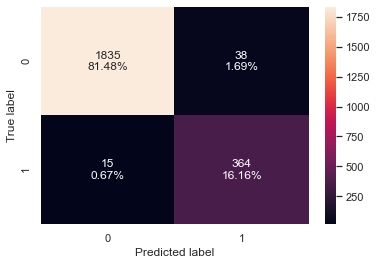

<IPython.core.display.Javascript object>

In [174]:
# Calculating different metrics for the best model across
# Train, Validation and Test sets

print("Training Performance :")
stacking4_train_perf = model_performance_classification(
    stacking_classifier4, X_train, y_train
)
print(stacking4_train_perf)

print("\nValidation Performace :")
stacking4_val_perf = model_performance_classification(
    stacking_classifier4, X_val, y_val
)
print(stacking4_val_perf)

print("\nTest Performace :")
stacking4_test_perf = model_performance_classification(
    stacking_classifier4, X_test, y_test
)
print(stacking4_test_perf)

confusion_matrix_sklearn(stacking_classifier4, X_test, y_test)

- Although this model is a little overfit on the train set, it is giving a generalized performance on validation and test sets 
- As **the metric scores on the unseen data (Test set) are still higher than the validation set, it is safe to use this model**

## Value Calculation

- The above model has made 364 True Positive (TP), 1835 True Negative (TN), 15 False Negative (FN) and 38 False Positive (FP) predictions out of 2252 customers on the test data
- Assuming a
    - profit of 50$ from one TP prediction
    
    - loss of 50$ from one FN prediction
    
    - an operational cost of 5$ spent on one FP prediction

Overall Profit = (364 x 50) - (15 x 50) - (38 x 5) = $17,260

Profit/customer = 16945/2252 = $7.66

**If this model were to make predictions on 20K customers in future, the Net Profit made by the company would be an estimate of $153,200**

## Business Insights and Recommendations

- The business can use this model to identify customers who may churn
- Top five features that drive the attrition are Tenure, Complain_ly, Marital_Status_Single, account_segment and Single_M
- Business may provide introductory offers to attract new customers and exclusive offers to existing new customers
- Customer care team must make additional efforts to solve customer complaints at the earliest as majority of customers who raised a complaint in the past year has churned. Follow-up calls are recommended.
- Marketing team can target Single/M customers with special discounts on paid channels and/or movies to customers from Regular Plus, Super and Super Plus segments
- Provide targeted offers to Female customers who prefer E-wallet/Mobile, from the Regular account segments 
- Also provide exclusive family offers for Married customers from HNI segment as churn rate is higher among them
- Business may consider increasing the cashback to Regular Plus customers and Debit card payment in order to reduce the churn
- Exit interview can be conducted to get feedback from outgoing customers and work towards the betterment of the services provided